In [1]:
#### HSC Comparison Analysis ####
library(ArchR)
library(BSgenome.Hsapiens.UCSC.hg38)
set.seed(1)

# Setup threads
threads <- parallel::detectCores() - 1
addArchRThreads(threads = threads)
addArchRLocking(FALSE)
addArchRGenome("hg38")


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
# Load project with peaks
proj <- loadArchRProject("ArchR_Collab_vs_Pub_Peaks")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [3]:
# Verify project loaded correctly
cat("\n=== Project Summary ===\n")
print(proj)

# Check available metadata
cat("\n=== Available Cell Metadata ===\n")
print(colnames(getCellColData(proj)))

# Check tissue and cell type distribution
cat("\n=== Cells by Tissue ===\n")
print(table(proj$Tissue))

cat("\n=== Cells by Unified Cell Type ===\n")
print(table(proj$CellType_Unified))

cat("\n=== Cells by Tissue_CellType ===\n")
print(table(proj$Tissue_CellType))


=== Project Summary ===



           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_Collab_vs_Pub_Peaks 
samples(5): collab_0 collab_1 granja_D8T1 granja_D9T1 granja_D7T1
sampleColData names(1): ArrowFiles
cellColData names(19): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 16833
medianTSS(1): 14.801
medianFrags(1): 18262

=== Available Cell Metadata ===
 [1] "Sample"           "TSSEnrichment"    "ReadsInTSS"       "ReadsInPromoter" 
 [5] "ReadsInBlacklist" "PromoterRatio"    "PassQC"           "NucleosomeRatio" 
 [9] "nMultiFrags"      "nMonoFrags"       "nFrags"           "nDiFrags"        
[13] "BlacklistRatio"   "Tissue"           "CellType"         "CellType_Unified"
[17] "Tissue_CellType"  "ReadsInPeaks"     "FRIP"            

=== Cells by Tissue ===

    BoneMarrow MobilizedBlood 
         10083           6750 

=== Cells by Unified Cell Type ===

    Basophil CLP_Lymphoid          CMP           DC    Erythroid          GMP 
         351     

In [4]:
#===========================================================================
# SUBSET TO HSC_MPP ONLY
#===========================================================================

cat("\n=== Subsetting to HSC_MPP cells ===\n")

# Get HSC_MPP cells
hsc_cells <- getCellNames(proj)[proj$CellType_Unified == "HSC_MPP"]
cat("Total HSC_MPP cells:", length(hsc_cells), "\n")

# Check HSC distribution by tissue
hsc_tissue <- proj$Tissue[proj$CellType_Unified == "HSC_MPP"]
cat("\nHSC_MPP cells by tissue:\n")
print(table(hsc_tissue))

# Create HSC-only project
proj_hsc <- subsetArchRProject(
  ArchRProj = proj,
  cells = hsc_cells,
  dropCells = TRUE,
  outputDirectory = "ArchR_HSC_Only",
  force = TRUE
)

cat("\n=== HSC Project Summary ===\n")
cat("Number of cells:", length(getCellNames(proj_hsc)), "\n")
cat("Number of samples:", length(unique(proj_hsc$Sample)), "\n")
cat("Samples:", paste(unique(proj_hsc$Sample), collapse = ", "), "\n")
cat("Tissues:", paste(unique(proj_hsc$Tissue), collapse = ", "), "\n")

# Save HSC-only project
saveArchRProject(proj_hsc, load = FALSE)


=== Subsetting to HSC_MPP cells ===
Total HSC_MPP cells: 5266 

HSC_MPP cells by tissue:
hsc_tissue
    BoneMarrow MobilizedBlood 
          1317           3949 


Copying ArchRProject to new outputDirectory : /work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_HSC_Only

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 10): collab_0

Copying Other Files (2 of 10): collab_1

Copying Other Files (3 of 10): Embeddings

Copying Other Files (4 of 10): granja_D7T1

Copying Other Files (5 of 10): granja_D8T1

Copying Other Files (6 of 10): granja_D9T1

Copying Other Files (7 of 10): GroupCoverages

Copying Other Files (8 of 10): IterativeLSI_Peaks

Copying Other Files (9 of 10): PeakCalls

Copying Other Files (10 of 10): Plots

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\   


=== HSC Project Summary ===
ror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send e

Saving ArchRProject...



In [5]:
print(proj_hsc)
# Set the correct names based on what's available
reducedDims_name <- "Harmony"
embedding_name <- names(proj_hsc@embeddings)[grep("Harmony|UMAP", names(proj_hsc@embeddings))[1]]
cat("Using embedding:", embedding_name, "\n")

# Create plots directory
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_HSC_Only 
samples(5): collab_0 collab_1 granja_D8T1 granja_D9T1 granja_D7T1
sampleColData names(1): ArrowFiles
cellColData names(19): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 5266
medianTSS(1): 14.1505
medianFrags(1): 20993.5
Using embedding: UMAP_Harmony_Peaks 



=== Creating HSC visualizations ===


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-994372ca015a-Date-2025-11-30_Time-14-32-10.599152.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-994372ca015a-Date-2025-11-30_Time-14-32-10.599152.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-994349ae538d-Date-2025-11-30_Time-14-32-12.305499.log
If there is an issue, please report to github with log

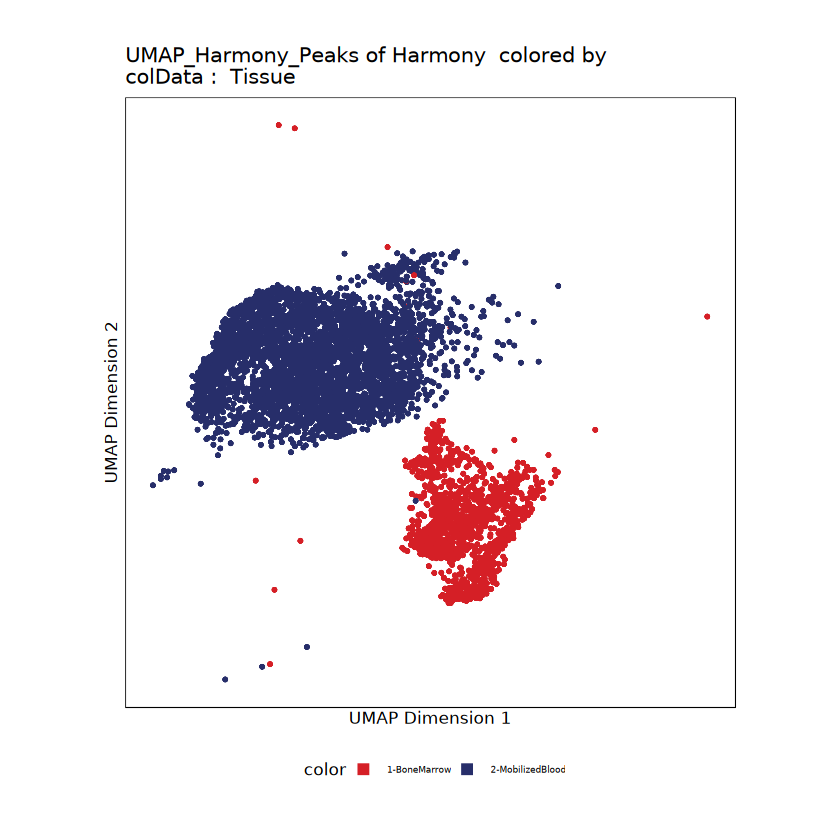

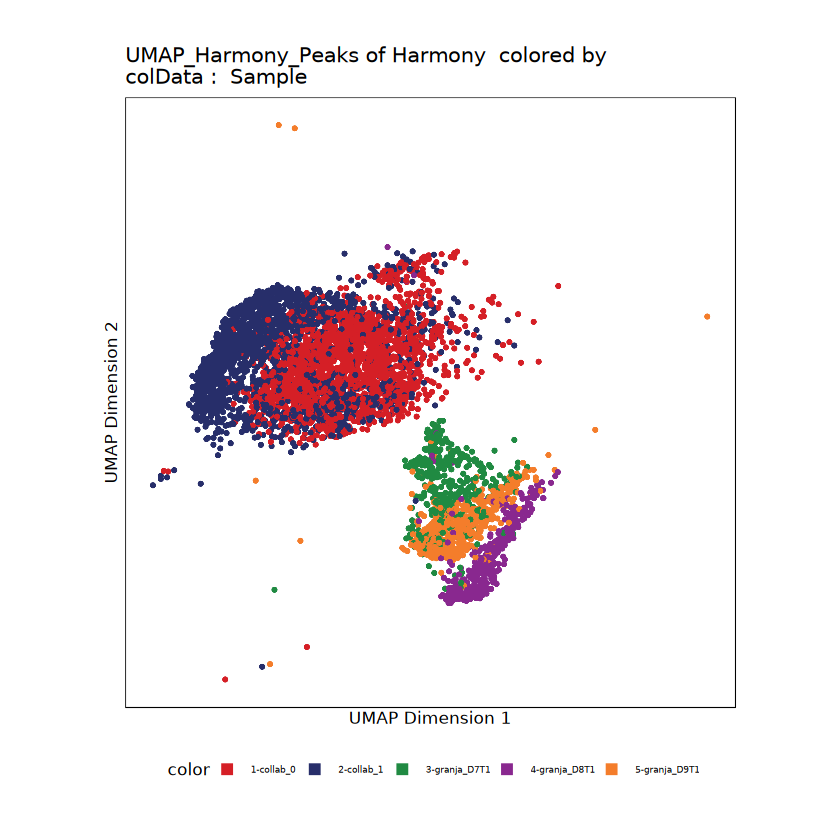

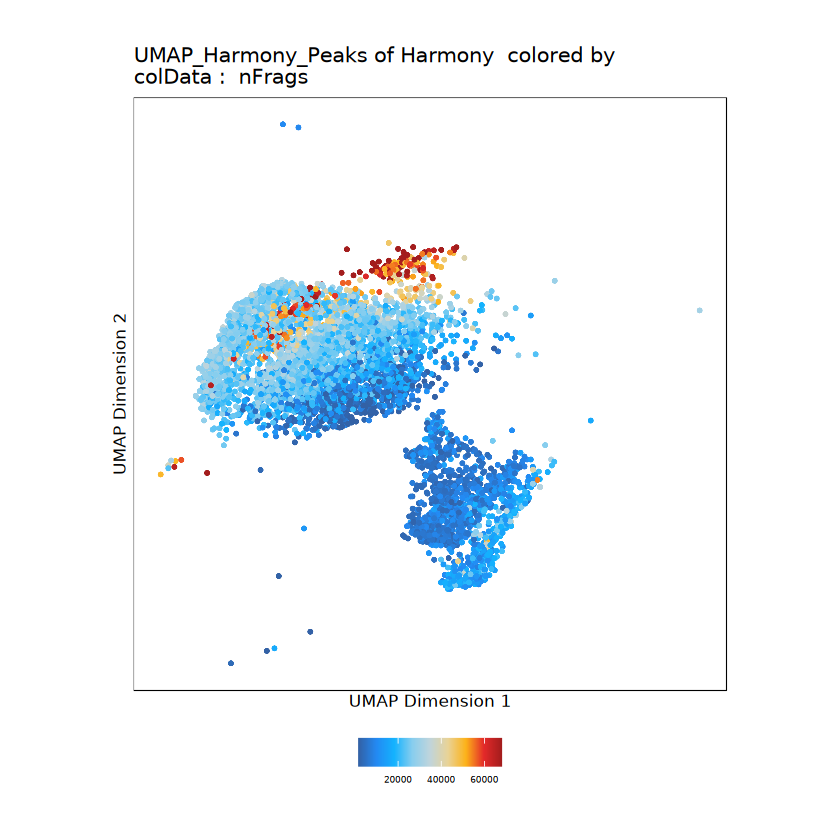


=== Plots saved successfully ===


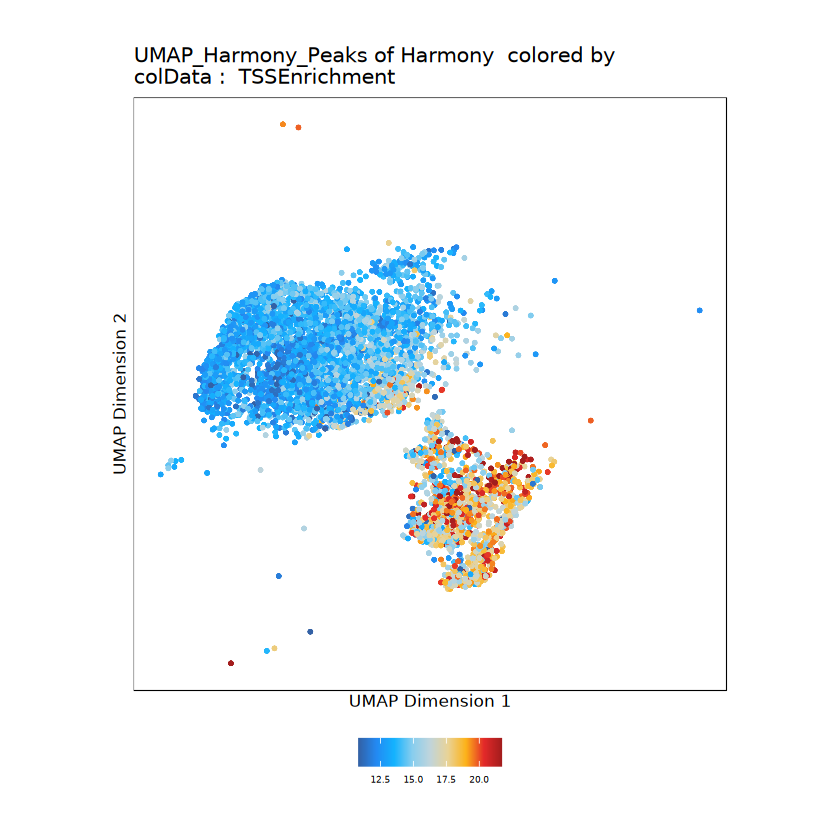

In [6]:
cat("\n=== Creating HSC visualizations ===\n")

# Create all plots and save them
p1 <- plotEmbedding(proj_hsc, colorBy = "cellColData", name = "Tissue",
                    embedding = "UMAP_Harmony_Peaks", plotAs = "points", 
                    size = 1.5, labelMeans = FALSE)

p2 <- plotEmbedding(proj_hsc, colorBy = "cellColData", name = "Sample",
                    embedding = "UMAP_Harmony_Peaks", plotAs = "points", 
                    size = 1.5, labelMeans = FALSE)

p3 <- plotEmbedding(proj_hsc, colorBy = "cellColData", name = "nFrags",
                    embedding = "UMAP_Harmony_Peaks", plotAs = "points", size = 1.5)

p4 <- plotEmbedding(proj_hsc, colorBy = "cellColData", name = "TSSEnrichment",
                    embedding = "UMAP_Harmony_Peaks", plotAs = "points", size = 1.5)

library(ggplot2)

ggsave(filename = file.path(proj_hsc@projectMetadata$outputDirectory, 
                            "Plots", "UMAP_HSC_by_Tissue.pdf"),
       plot = p1, width = 6, height = 6)

ggsave(filename = file.path(proj_hsc@projectMetadata$outputDirectory, 
                            "Plots", "UMAP_HSC_by_Sample.pdf"),
       plot = p2, width = 6, height = 6)

ggsave(filename = file.path(proj_hsc@projectMetadata$outputDirectory, 
                            "Plots", "UMAP_HSC_by_nFrags.pdf"),
       plot = p3, width = 6, height = 6)

ggsave(filename = file.path(proj_hsc@projectMetadata$outputDirectory, 
                            "Plots", "UMAP_HSC_by_TSS.pdf"),
       plot = p4, width = 6, height = 6)

# Display in notebook
print(p1)
print(p2)
print(p3)
print(p4)

cat("\n=== Plots saved successfully ===\n")


=== Adding Gene Scores for HSC markers ===


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-9943302e8dab-Date-2025-11-30_Time-14-32-32.867446.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-11-30 14:32:33.499517 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-9943302e8dab-Date-2025-11-30_Time-14-32-32.867446.log



Saved: CD34 
d errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs


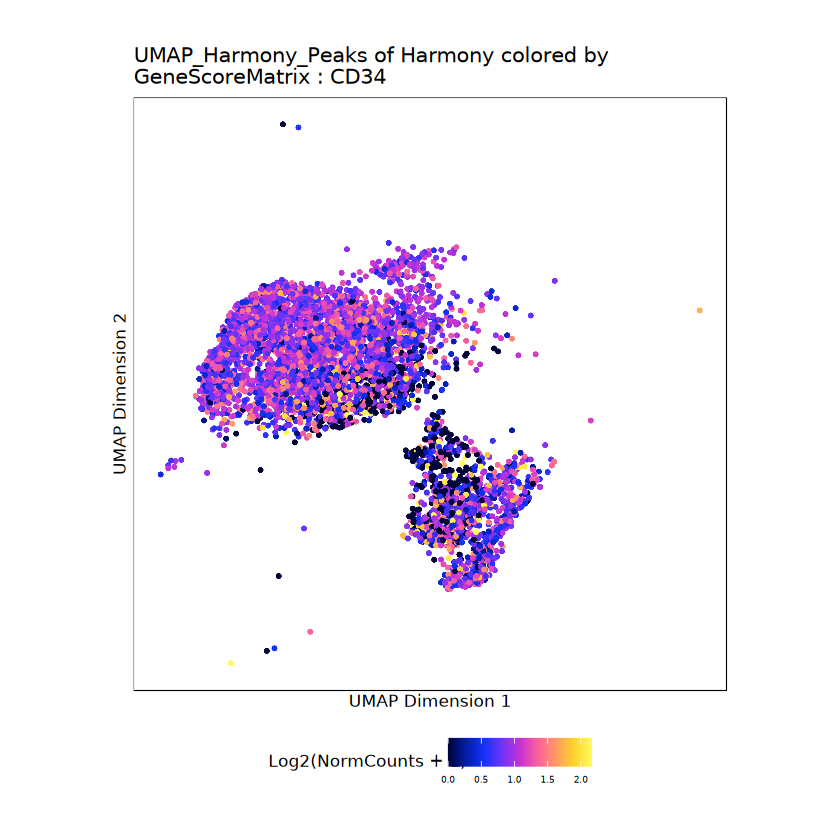

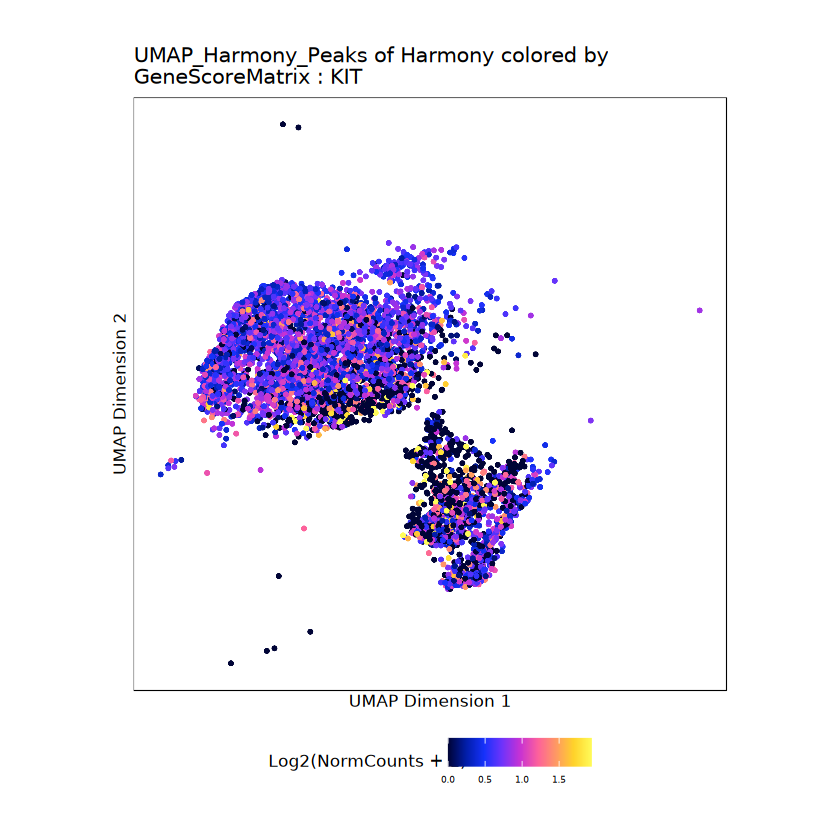

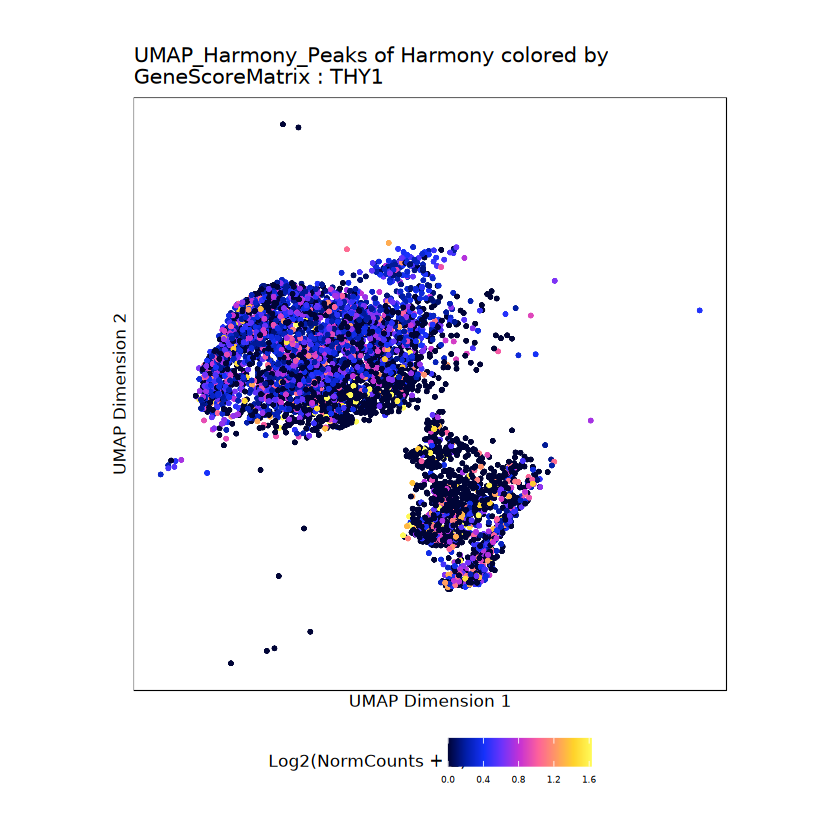

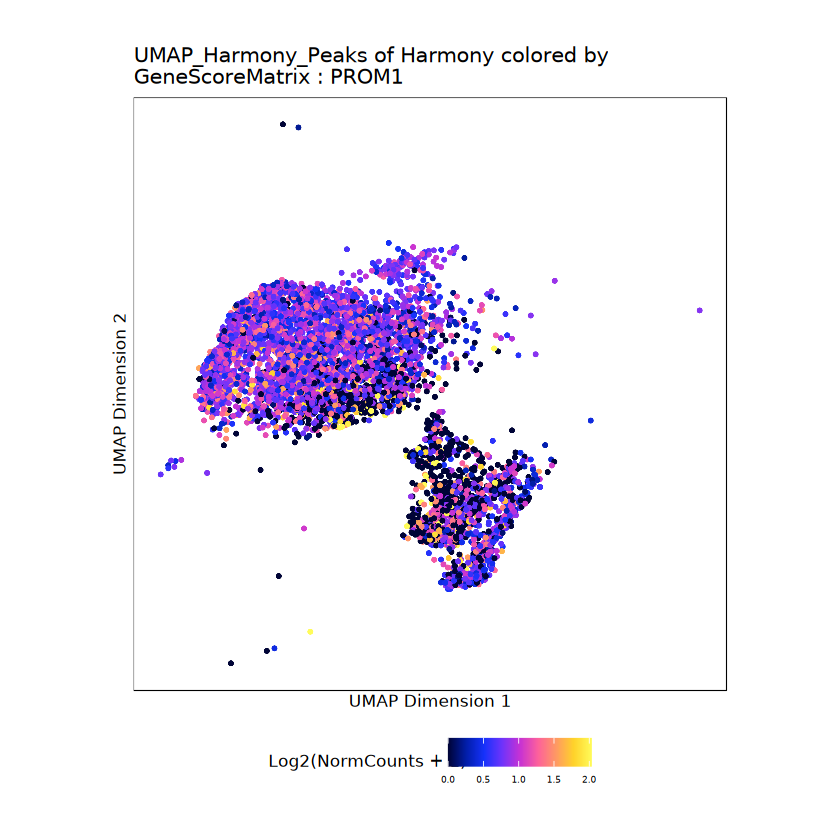

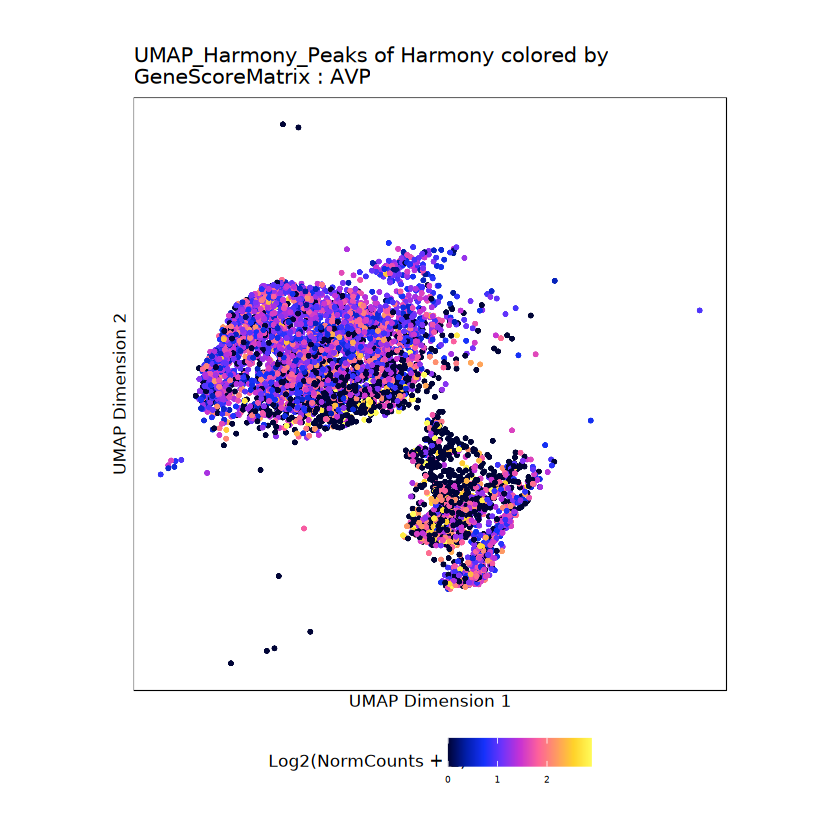

: HLF 


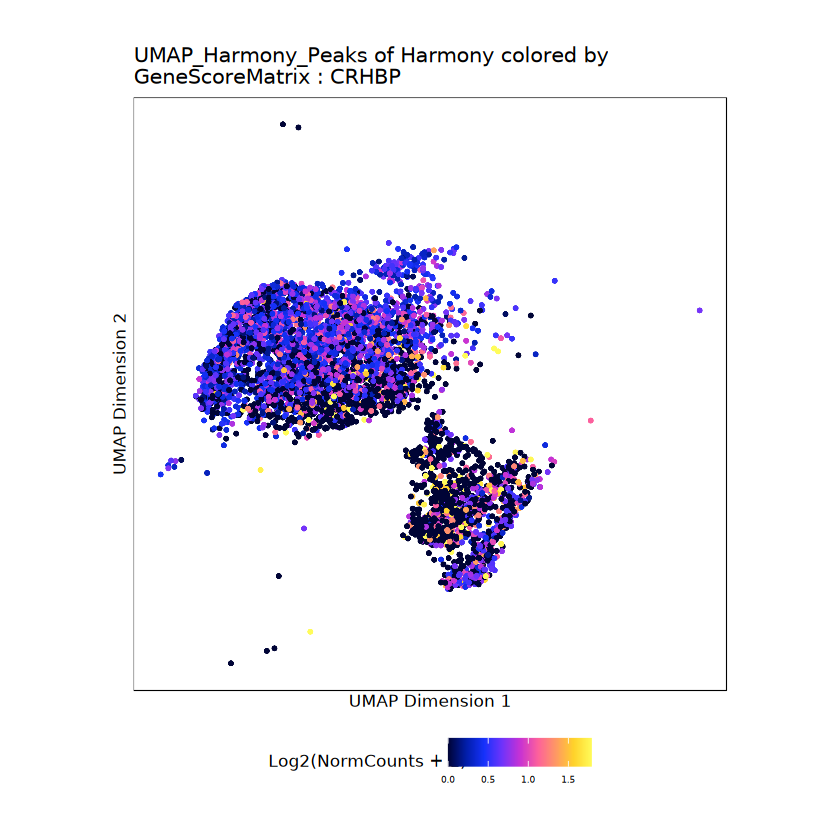

Saved: MLLT3 


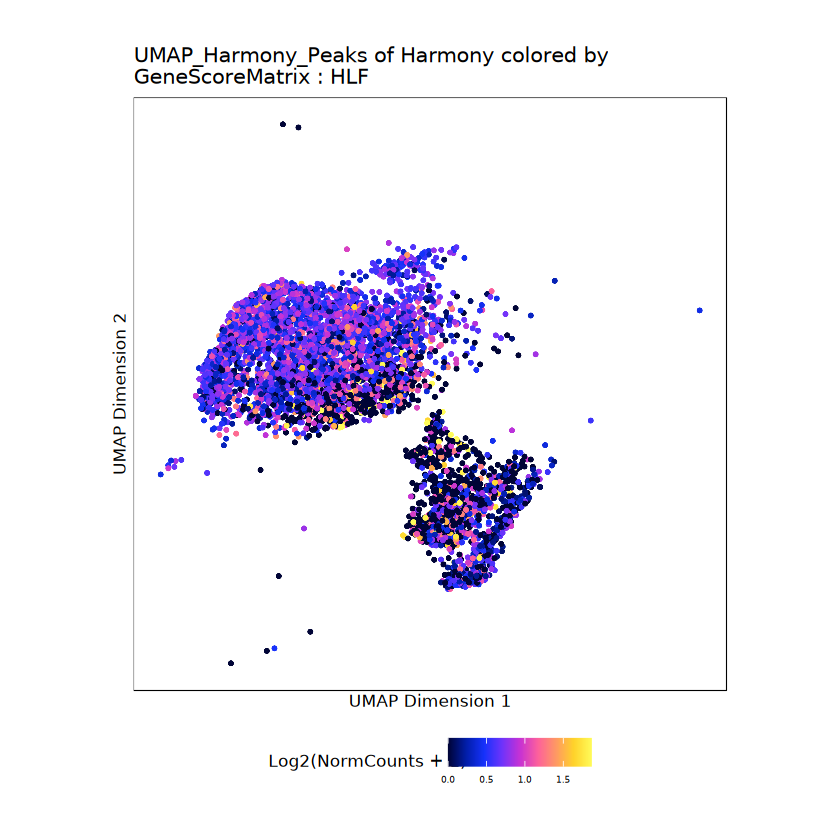

Saved: HOXA9 


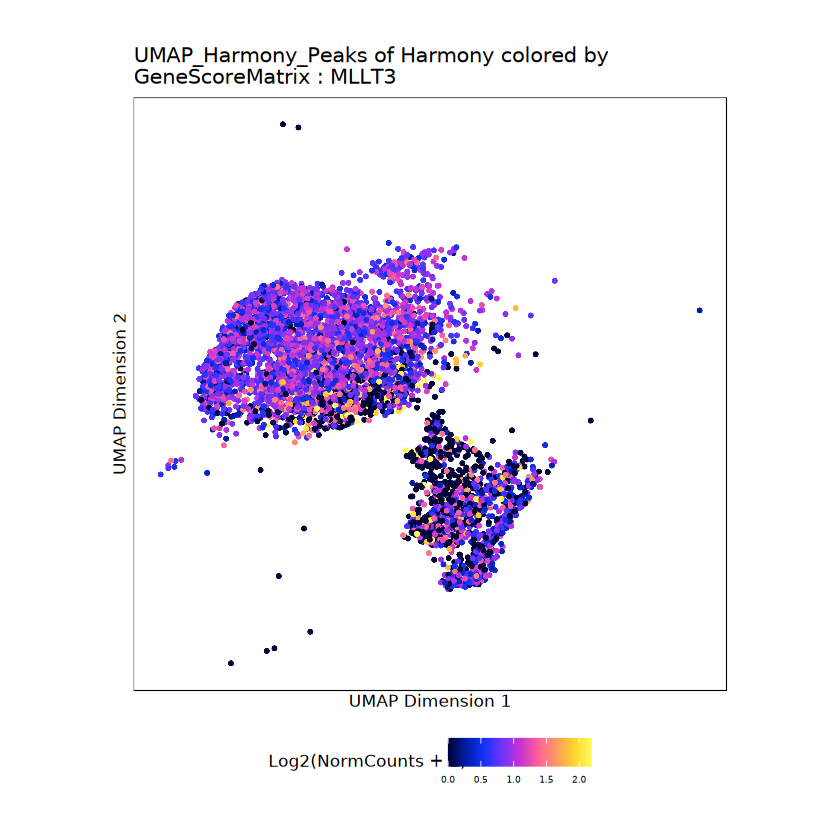

Saved: MEIS1 


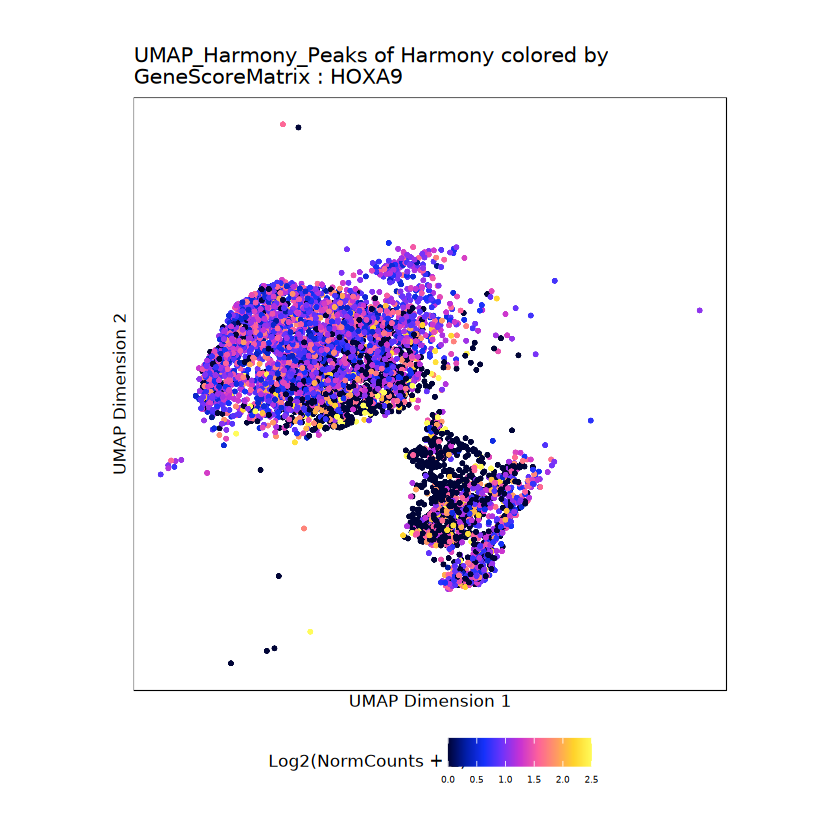

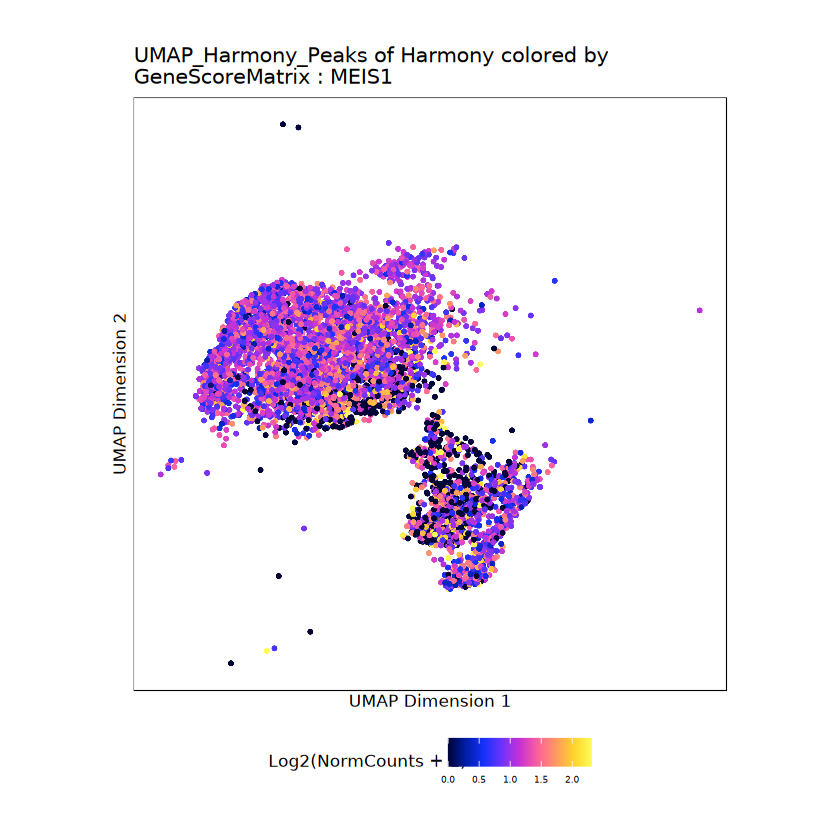

In [7]:
#===========================================================================
# MARKER GENES - HSC-specific genes
#===========================================================================

cat("\n=== Adding Gene Scores for HSC markers ===\n")

# Define HSC marker genes
hsc_markers <- c(
  "CD34",
  "KIT",
  "THY1",
  "PROM1",
  "AVP", 
  "CRHBP",
  "HLF",
  "MLLT3",
  "HOXA9",
  "MEIS1"
)

# Plot gene scores on UMAP
p_genes <- plotEmbedding(
  ArchRProj = proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = hsc_markers,
  embedding = "UMAP_Harmony_Peaks",
  plotAs = "points",
  size = 1.5,
  quantCut = c(0.01, 0.99)
)

# Save plots
library(ggplot2)

plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

# Save and display each gene plot
for(i in seq_along(p_genes)) {
  gene_name <- hsc_markers[i]
  filename <- file.path(plots_dir, paste0("UMAP_HSC_", gene_name, ".pdf"))
  
  tryCatch({
    ggsave(filename = filename, plot = p_genes[[i]], width = 5, height = 5)
    cat("Saved:", gene_name, "\n")
  }, error = function(e) {
    cat("Failed to save", gene_name, ":", e$message, "\n")
  })
  print(p_genes[[i]])
}

# HSC-Differential: BoneMarrow vs. MobilizedBlood

In [8]:
# Get marker peaks between tissues
markersPeaks <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "PeakMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "MobilizedBlood",
  bgdGroups = "BoneMarrow"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-994369d4f93f-Date-2025-11-30_Time-14-33-12.58709.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-11-30 14:33:13.570734 : Matching Known Biases, 0.01 mins elapsed.

2025-11-30 14:33:16.068291 : Computing Pairwise Tests (1 of 1), 0.052 mins elapsed.

Pairwise Test MobilizedBlood : Seqnames chr1

Pairwise Test MobilizedBlood : Seqnames chr10

Pairwise Test MobilizedBlood : Seqnames chr11

Pairwise Test MobilizedBlood : Seqnames chr12

Pairwise Test MobilizedBlood : Seqnames chr13

Pairwise Test MobilizedBlood : Seqnames chr14

Pairwise Test MobilizedBlood : Seqnames chr15

Pairwise Test MobilizedBlood : Seqnames chr16

Pairwise Test MobilizedBlood : Seqnames chr17

Pairwise Test MobilizedBlood : Seqnames chr18

Pairwise Test MobilizedBlood : Seqnames chr19

Pairwise Test MobilizedBlood : Seqnames chr2

Pairwise Test MobilizedBlood : Seqnames chr20

Pairwise Test MobilizedBlood :

In [9]:
# Get list of significant peaks
markerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5")

cat("\n=== Number of differential peaks ===\n")
print(markerList)


=== Number of differential peaks ===
List of length 1
names(1): MobilizedBlood



MobilizedBlood-enriched peaks: 37588 


Warning message:
“Removed 217 rows containing missing values or values outside the scale range
(`geom_point_rast()`).”
Warning message:
“Removed 217 rows containing missing values or values outside the scale range
(`geom_point_rast()`).”
Warning message:
“Removed 217 rows containing missing values or values outside the scale range
(`geom_point_rast()`).”
Warning message:
“Removed 217 rows containing missing values or values outside the scale range
(`geom_point_rast()`).”


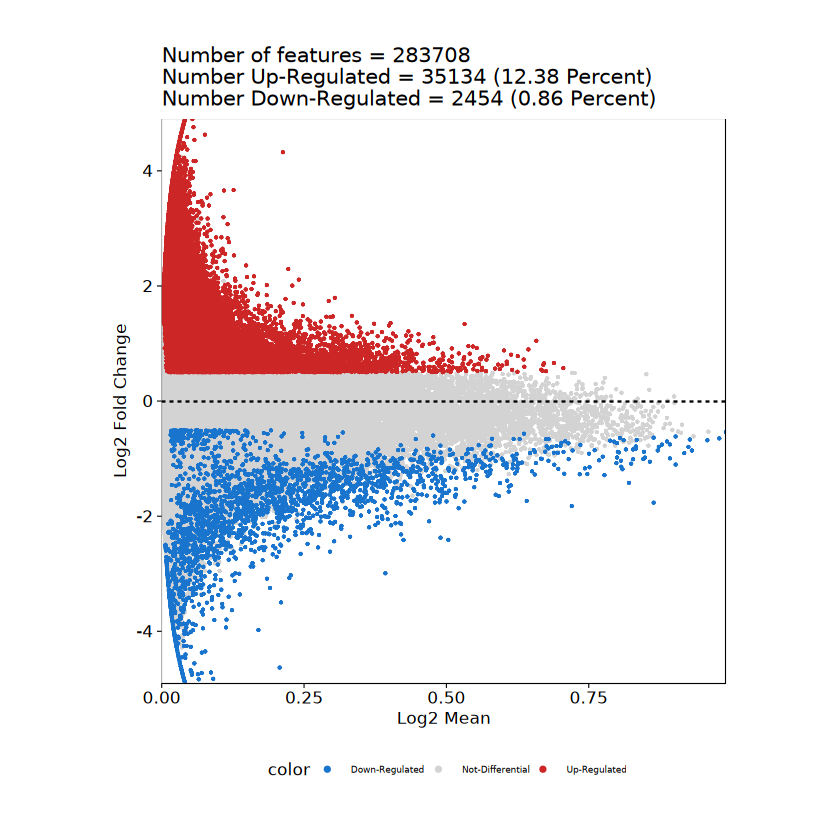


=== Peak counts at different cutoffs ===
FDR <= 0.05, |Log2FC| >= 0.5: 37588 
FDR <= 0.01, |Log2FC| >= 1.0: 13179 
FDR <= 0.01, |Log2FC| >= 1.25: 10986 


ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-994331661614-Date-2025-11-30_Time-14-35-35.825801.log
If there is an issue, please report to github with logFile!

Identified 10986 markers!



 [1] "chr1:869655-870155" "chr1:903658-904158" "chr1:905130-905630"
 [4] "chr1:905766-906266" "chr1:919539-920039" "chr1:920441-920941"
 [7] "chr1:921845-922345" "chr1:924122-924622" "chr1:926041-926541"
[10] "chr1:933295-933795" "chr1:939678-940178" "chr1:942984-943484"
[13] "chr1:958520-959020" "chr1:959799-960299" "chr1:960308-960808"


Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-994331661614-Date-2025-11-30_Time-14-35-35.825801.log



✓ Saved: HSC_Peaks_Heatmap.pdf

=== Differential peak analysis complete ===


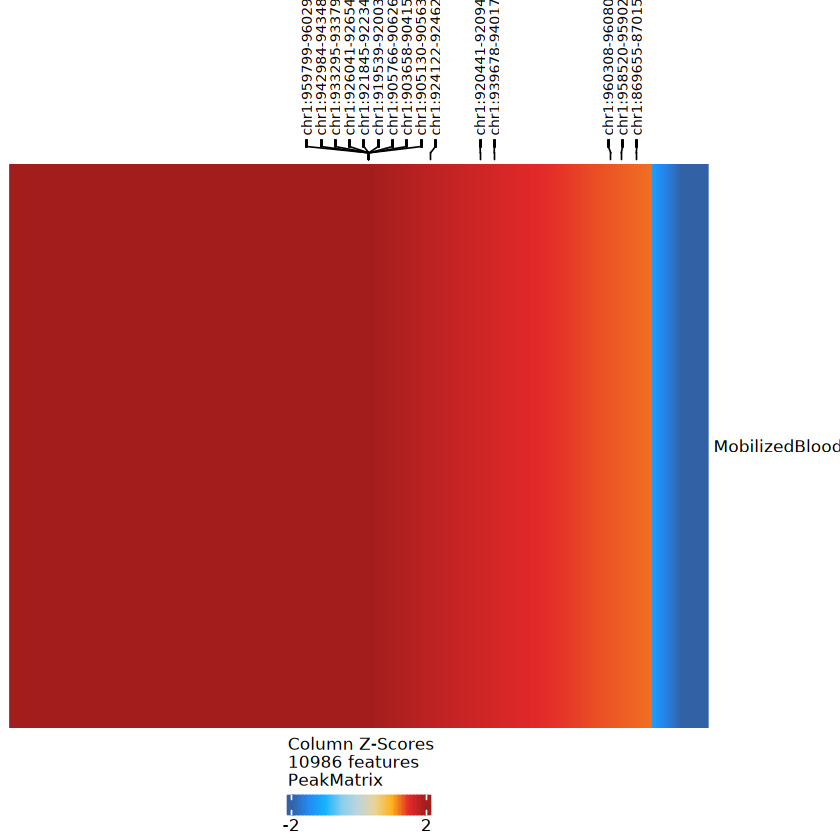

In [10]:
# Extract MobilizedBlood-enriched peaks
mb_peaks <- markerList$MobilizedBlood
cat("\nMobilizedBlood-enriched peaks:", nrow(mb_peaks), "\n")

# Save marker peaks
write.csv(mb_peaks, "HSC_MobilizedBlood_enriched_peaks.csv", row.names = FALSE)

# Create MA plot
pMA <- plotMarkers(seMarker = markersPeaks, 
                   name = "MobilizedBlood", 
                   cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
                   plotAs = "MA")

# Save and display MA plot
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

ggsave(filename = file.path(plots_dir, "HSC_Peaks_MA_Plot.pdf"), 
       plot = pMA, width = 5, height = 5)
print(pMA)

# Create Volcano plot
pVolcano <- plotMarkers(seMarker = markersPeaks, 
                        name = "MobilizedBlood", 
                        cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
                        plotAs = "Volcano")

# Save and display Volcano plot
ggsave(filename = file.path(plots_dir, "HSC_Peaks_Volcano_Plot.pdf"), 
       plot = pVolcano, width = 5, height = 5)
print(pVolcano)

# Check how many peaks at different cutoffs
cat("\n=== Peak counts at different cutoffs ===\n")
cat("FDR <= 0.05, |Log2FC| >= 0.5:", 
    sum(mb_peaks$FDR <= 0.05 & abs(mb_peaks$Log2FC) >= 0.5), "\n")
cat("FDR <= 0.01, |Log2FC| >= 1.0:", 
    sum(mb_peaks$FDR <= 0.01 & abs(mb_peaks$Log2FC) >= 1.0), "\n")
cat("FDR <= 0.01, |Log2FC| >= 1.25:", 
    sum(mb_peaks$FDR <= 0.01 & abs(mb_peaks$Log2FC) >= 1.25), "\n")

# Heatmap of top differential peaks (following tutorial style)
heatmapPeaks <- plotMarkerHeatmap(
  seMarker = markersPeaks,
  cutOff = "FDR <= 0.01 & abs(Log2FC) >= 1.25",  # Stricter cutoff like tutorial
  plotLog2FC = TRUE,
  transpose = TRUE
)

# Save and display using ComplexHeatmap::draw (like tutorial)
tryCatch({
  pdf(file.path(plots_dir, "HSC_Peaks_Heatmap.pdf"), width = 8, height = 10)
  ComplexHeatmap::draw(heatmapPeaks, 
                       heatmap_legend_side = "bot", 
                       annotation_legend_side = "bot")
  dev.off()
  cat("✓ Saved: HSC_Peaks_Heatmap.pdf\n")
}, error = function(e) {
  cat("✗ Failed to save heatmap:", e$message, "\n")
})

# Display in notebook
ComplexHeatmap::draw(heatmapPeaks, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

cat("\n=== Differential peak analysis complete ===\n")

In [11]:
#===========================================================================
# 1. DIFFERENTIAL PEAK ACCESSIBILITY
#===========================================================================

cat("\n=== Running Differential Peak Analysis ===\n")

# Get marker peaks between tissues
markersPeaks <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "PeakMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

# Heatmap of top differential peaks
heatmapPeaks <- plotMarkerHeatmap(
  seMarker = markersPeaks,
  cutOff = "FDR <= 0.01 & Log2FC >= 0.5",
  nLabel = 5,
  transpose = TRUE
)

draw(heatmapPeaks, heatmap_legend_side = "bot", 
     annotation_legend_side = "bot")

# Get marker peaks list
markerList <- getMarkers(
  markersPeaks,
  cutOff = "FDR <= 0.05 & Log2FC >= 0.5"
)

cat("\n=== Number of differential peaks ===\n")
print(markerList)

# Export tissue-specific peaks
for(tissue in names(markerList)) {
  write.csv(markerList[[tissue]], 
            paste0("HSC_", tissue, "_marker_peaks.csv"),
            row.names = FALSE)
  cat("Exported:", tissue, "-", nrow(markerList[[tissue]]), "peaks\n")
}

# MA plot
pMA <- plotMarkers(seMarker = markersPeaks, 
                   name = "MobilizedBlood", 
                   cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
                   plotAs = "MA")

plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

ggsave(filename = file.path(plots_dir, "HSC_Peaks_MA_Plot.pdf"), 
       plot = pMA, width = 5, height = 5)
print(pMA)

# Volcano plot
pVolcano <- plotMarkers(seMarker = markersPeaks, 
                        name = "MobilizedBlood", 
                        cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
                        plotAs = "Volcano")

ggsave(filename = file.path(plots_dir, "HSC_Peaks_Volcano_Plot.pdf"), 
       plot = pVolcano, width = 5, height = 5)
print(pVolcano)


=== Running Differential Peak Analysis ===


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-994351b72b46-Date-2025-11-30_Time-14-41-30.905444.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-11-30 14:41:32.086241 : Matching Known Biases, 0.01 mins elapsed.

###########
2025-11-30 14:42:30.606126 : Completed Pairwise Tests, 0.986 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-994351b72b46-Date-2025-11-30_Time-14-41-30.905444.log

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-9943450df560-Date-2025-11-30_Time-14-42-31.491301.log
If there is an issue, please report to github with logFile!



ERROR: Error in plotMarkerHeatmap(seMarker = markersPeaks, cutOff = "FDR <= 0.01 & Log2FC >= 0.5", : Must use plotLog2FC = TRUE when ncol(seMarker) <= 2!


In [12]:
#===========================================================================
# 2. DIFFERENTIAL GENE ACCESSIBILITY
#===========================================================================

cat("\n=== Running Differential Gene Score Analysis ===\n")

# Get marker genes
markersGS <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "GeneScoreMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

# Define HSC marker genes to label
markerGenes <- c(
  "CD34", "KIT", "THY1", "PROM1", "HLF", 
  "CRHBP", "HOXA9", "MEIS1", "MPL", "PROCR"
)

# Heatmap of genes with labeled markers
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.0", 
  labelMarkers = markerGenes,
  nLabel = 10,
  transpose = TRUE
)

draw(heatmapGS, heatmap_legend_side = "bot", 
     annotation_legend_side = "bot")

# Get marker genes list
markerGeneList <- getMarkers(
  markersGS,
  cutOff = "FDR <= 0.05 & Log2FC >= 0.5"
)

cat("\n=== Number of differential genes ===\n")
print(markerGeneList)

# Export tissue-specific genes
for(tissue in names(markerGeneList)) {
  write.csv(markerGeneList[[tissue]], 
            paste0("HSC_", tissue, "_marker_genes.csv"),
            row.names = FALSE)
  cat("Exported:", tissue, "-", nrow(markerGeneList[[tissue]]), "genes\n")
}

# MA plot for genes
pMA_genes <- plotMarkers(seMarker = markersGS, 
                         name = "MobilizedBlood", 
                         cutOff = "FDR <= 0.05 & Log2FC >= 0.5", 
                         plotAs = "MA")

ggsave(filename = file.path(plots_dir, "HSC_Genes_MA_Plot.pdf"), 
       plot = pMA_genes, width = 5, height = 5)
print(pMA_genes)

# Volcano plot for genes
pVolcano_genes <- plotMarkers(seMarker = markersGS, 
                              name = "MobilizedBlood", 
                              cutOff = "FDR <= 0.05 & Log2FC >= 0.5", 
                              plotAs = "Volcano")

ggsave(filename = file.path(plots_dir, "HSC_Genes_Volcano_Plot.pdf"), 
       plot = pVolcano_genes, width = 5, height = 5)
print(pVolcano_genes)

cat("\n=== Differential analysis complete ===\n")


=== Running Differential Gene Score Analysis ===


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-99436ad20e81-Date-2025-11-30_Time-15-27-30.804887.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2025-11-30 15:27:32.083904 : Matching Known Biases, 0.013 mins elapsed.

###########
2025-11-30 15:28:30.858938 : Completed Pairwise Tests, 0.993 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-99436ad20e81-Date-2025-11-30_Time-15-27-30.804887.log

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-994366b100f3-Date-2025-11-30_Time-15-28-31.004591.log
If there is an issue, please report to github with logFile!



ERROR: Error in plotMarkerHeatmap(seMarker = markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.0", : Must use plotLog2FC = TRUE when ncol(seMarker) <= 2!


In [ ]:
#===========================================================================
# DIFFERENTIAL GENE SCORES
#===========================================================================
cat("\n=== Differential Gene Score Analysis ===\n")

# Get marker genes between tissues
markersGenes <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "GeneScoreMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

# Get markers for BOTH groups
markerListGenes <- getMarkers(markersGenes, cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5")

cat("\nDifferential genes per tissue:\n")
print(sapply(markerListGenes, nrow))

# Save both directions
write.csv(markerListGenes$MobilizedBlood, "HSC_Genes_MobilizedBlood_enriched.csv", row.names = FALSE)
write.csv(markerListGenes$BoneMarrow, "HSC_Genes_BoneMarrow_enriched.csv", row.names = FALSE)

# Heatmap of top differential genes
heatmapGenes <- plotMarkerHeatmap(
  seMarker = markersGenes,
  cutOff = "FDR <= 0.01 & abs(Log2FC) >= 1.0",
  labelMarkers = markerListGenes$MobilizedBlood$name[1:15],  # Label top genes
  transpose = TRUE
)

pdf(file.path(plots_dir, "HSC_Genes_Heatmap.pdf"), width = 8, height = 10)
ComplexHeatmap::draw(heatmapGenes, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ComplexHeatmap::draw(heatmapGenes, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [ ]:
# Get markers for BOTH directions
markersGS <- getMarkerFeatures(

ArchRProj = proj_hsc,
  useMatrix = "GeneScoreMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

markerGeneList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5")
# Now markerGeneList$MobilizedBlood AND markerGeneList$BoneMarrow exist

In [ ]:
cat("MobilizedBlood-enriched genes:", nrow(markerGeneList$MobilizedBlood), "\n")
cat("BoneMarrow-enriched genes:", nrow(markerGeneList$BoneMarrow), "\n")

# Save both
write.csv(markerGeneList$MobilizedBlood, "HSC_Genes_UP_in_MobilizedBlood.csv", row.names = FALSE)
write.csv(markerGeneList$BoneMarrow, "HSC_Genes_UP_in_BoneMarrow.csv", row.names = FALSE)

In [ ]:
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS,
  cutOff = "FDR <= 0.01 & abs(Log2FC) >= 1",
  transpose = TRUE,
  plotLog2FC = TRUE
)

ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [ ]:
# Top genes from each tissue for visualization
top_MB <- head(markerGeneList$MobilizedBlood$name, 10)
top_BM <- head(markerGeneList$BoneMarrow$name, 10)

cat("\nTop MobilizedBlood genes:", paste(top_MB, collapse = ", "), "\n")
cat("Top BoneMarrow genes:", paste(top_BM, collapse = ", "), "\n")

In [ ]:
# The markerGeneList should already be data frames
mb_genes <- markerGeneList$MobilizedBlood
bm_genes <- markerGeneList$BoneMarrow

# Check the structure and Log2FC values
cat("MobilizedBlood Log2FC range:", range(mb_genes$Log2FC), "\n")
cat("BoneMarrow Log2FC range:", range(bm_genes$Log2FC), "\n")

# Filter to ensure correct direction and sort by effect size
mb_up <- mb_genes[mb_genes$Log2FC > 0, ]
mb_up <- mb_up[order(-mb_up$Log2FC), ]

bm_up <- bm_genes[bm_genes$Log2FC > 0, ]
bm_up <- bm_up[order(-bm_up$Log2FC), ]

cat("\nGenes UP in MobilizedBlood:", nrow(mb_up), "\n")
cat("Genes UP in BoneMarrow:", nrow(bm_up), "\n")

cat("\nTop 10 MobilizedBlood-enriched genes:\n")
print(head(mb_up[, c("name", "Log2FC", "FDR")], 10))

cat("\nTop 10 BoneMarrow-enriched genes:\n")
print(head(bm_up[, c("name", "Log2FC", "FDR")], 10))

In [ ]:
# Save the correctly filtered lists
write.csv(mb_up, "HSC_Genes_UP_in_MobilizedBlood.csv", row.names = FALSE)
write.csv(bm_up, "HSC_Genes_UP_in_BoneMarrow.csv", row.names = FALSE)

# Plot top genes from EACH tissue on UMAP
top_mb <- head(mb_up$name, 5)
top_bm <- head(bm_up$name, 5)

p_mb <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_mb,
  embedding = "UMAP_Harmony_Peaks",
  plotAs = "points",
  size = 1.5
)

p_bm <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_bm,
  embedding = "UMAP_Harmony_Peaks",
  plotAs = "points",
  size = 1.5
)

plotPDF(p_mb, name = "HSC_Top_MobilizedBlood_Genes.pdf", ArchRProj = proj_hsc, addDOC = FALSE)
plotPDF(p_bm, name = "HSC_Top_BoneMarrow_Genes.pdf", ArchRProj = proj_hsc, addDOC = FALSE)

In [ ]:
# First add imputation weights for better visualization
proj_hsc <- addImputeWeights(proj_hsc, reducedDims = "Harmony_Peaks")

# Plot with imputation
p_mb <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_mb,
  embedding = "UMAP_Harmony_Peaks",
  plotAs = "points",
  size = 1.5,
  imputeWeights = getImputeWeights(proj_hsc)
)

p_bm <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_bm,
  embedding = "UMAP_Harmony_Peaks",
  plotAs = "points",
  size = 1.5,
  imputeWeights = getImputeWeights(proj_hsc)
)

# Save using ggsave instead of plotPDF
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")

for(i in seq_along(p_mb)) {
  ggsave(
    filename = file.path(plots_dir, paste0("HSC_MB_", top_mb[i], ".pdf")),
    plot = p_mb[[i]], width = 5, height = 5
  )
}

for(i in seq_along(p_bm)) {
  ggsave(
    filename = file.path(plots_dir, paste0("HSC_BM_", top_bm[i], ".pdf")),
    plot = p_bm[[i]], width = 5, height = 5
  )
}

# Display in notebook
print(p_mb)
print(p_bm)

In [ ]:
proj_hsc <- addImputeWeights(proj_hsc, reducedDims = "Harmony")

In [ ]:
# Check available embeddings
names(proj_hsc@embeddings)

In [ ]:
cat("\nRaw marker counts:\n")
cat("MobilizedBlood entries:", nrow(markerGeneList$MobilizedBlood), "\n")
cat("BoneMarrow entries:", nrow(markerGeneList$BoneMarrow), "\n")

# Extract and filter by POSITIVE Log2FC (enriched in that group)
mb_genes <- markerGeneList$MobilizedBlood
bm_genes <- markerGeneList$BoneMarrow

mb_up <- mb_genes[mb_genes$Log2FC > 0, ]
mb_up <- mb_up[order(-mb_up$Log2FC), ]

bm_up <- bm_genes[bm_genes$Log2FC > 0, ]
bm_up <- bm_up[order(-bm_up$Log2FC), ]

cat("\nFiltered by positive Log2FC:\n")
cat("Genes UP in MobilizedBlood:", nrow(mb_up), "\n")
cat("Genes UP in BoneMarrow:", nrow(bm_up), "\n")

# Filter to protein-coding (remove lncRNAs, miRNAs, etc.)
mb_coding <- mb_up[!grepl("^LOC|^LINC|^MIR|^SNORD|^RNU|^RNVU|^AC[0-9]|^AL[0-9]", mb_up$name), ]
bm_coding <- bm_up[!grepl("^LOC|^LINC|^MIR|^SNORD|^RNU|^RNVU|^AC[0-9]|^AL[0-9]", bm_up$name), ]

cat("\nProtein-coding genes:\n")
cat("MobilizedBlood:", nrow(mb_coding), "\n")
cat("BoneMarrow:", nrow(bm_coding), "\n")

cat("\nTop 15 MobilizedBlood-enriched (protein-coding):\n")
print(head(mb_coding[, c("name", "Log2FC", "FDR")], 15))

cat("\nTop 15 BoneMarrow-enriched (protein-coding):\n")
print(head(bm_coding[, c("name", "Log2FC", "FDR")], 15))

# Save all gene lists
write.csv(mb_up, file.path(plots_dir, "HSC_Genes_UP_in_MobilizedBlood_all.csv"), row.names = FALSE)
write.csv(bm_up, file.path(plots_dir, "HSC_Genes_UP_in_BoneMarrow_all.csv"), row.names = FALSE)
write.csv(mb_coding, file.path(plots_dir, "HSC_Genes_UP_in_MobilizedBlood_coding.csv"), row.names = FALSE)
write.csv(bm_coding, file.path(plots_dir, "HSC_Genes_UP_in_BoneMarrow_coding.csv"), row.names = FALSE)


In [ ]:
#===========================================================================
# 3. GENE SCORE HEATMAP
#===========================================================================

cat("\n=== Creating Gene Heatmap ===\n")

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS,
  cutOff = "FDR <= 0.01 & abs(Log2FC) >= 1",
  transpose = TRUE,
  plotLog2FC = TRUE
)

pdf(file.path(plots_dir, "HSC_Genes_Heatmap.pdf"), width = 8, height = 10)
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [ ]:
#===========================================================================
# NON-OVERLAPPING GENE ANALYSIS
#===========================================================================

# Get genes unique to each tissue (not significant in the other direction)
mb_unique <- mb_up[!mb_up$name %in% bm_up$name, ]
bm_unique <- bm_up[!bm_up$name %in% mb_up$name, ]

cat("Unique to MobilizedBlood:", nrow(mb_unique), "\n")
cat("Unique to BoneMarrow:", nrow(bm_unique), "\n")
cat("Overlapping:", nrow(mb_up) - nrow(mb_unique), "\n")

# Filter to protein-coding
mb_unique_coding <- mb_unique[!grepl("^LOC|^LINC|^MIR|^SNORD|^RNU|^RNVU|^AC[0-9]|^AL[0-9]", mb_unique$name), ]
bm_unique_coding <- bm_unique[!grepl("^LOC|^LINC|^MIR|^SNORD|^RNU|^RNVU|^AC[0-9]|^AL[0-9]", bm_unique$name), ]

cat("\nProtein-coding unique genes:\n")
cat("MobilizedBlood:", nrow(mb_unique_coding), "\n")
cat("BoneMarrow:", nrow(bm_unique_coding), "\n")

# Top unique genes
cat("\n=== Top 30 MobilizedBlood-UNIQUE genes ===\n")
print(head(mb_unique_coding[, c("name", "Log2FC", "FDR")], 30))

cat("\n=== Top 30 BoneMarrow-UNIQUE genes ===\n")
print(head(bm_unique_coding[, c("name", "Log2FC", "FDR")], 30))

# Save
write.csv(mb_unique_coding, file.path(plots_dir, "HSC_Genes_UNIQUE_to_MobilizedBlood.csv"), row.names = FALSE)
write.csv(bm_unique_coding, file.path(plots_dir, "HSC_Genes_UNIQUE_to_BoneMarrow.csv"), row.names = FALSE)


In [ ]:
#===========================================================================
# 4. MA AND VOLCANO PLOTS FOR GENES
#===========================================================================

cat("\n=== Creating MA and Volcano Plots ===\n")

# MA plot - MobilizedBlood perspective
pMA_mb <- plotMarkers(
  seMarker = markersGS, 
  name = "MobilizedBlood", 
  cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
  plotAs = "MA"
)
ggsave(file.path(plots_dir, "HSC_Genes_MA_MobilizedBlood.pdf"), pMA_mb, width = 6, height = 5)
print(pMA_mb)

# Volcano plot - MobilizedBlood perspective
pVolcano_mb <- plotMarkers(
  seMarker = markersGS, 
  name = "MobilizedBlood", 
  cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
  plotAs = "Volcano"
)
ggsave(file.path(plots_dir, "HSC_Genes_Volcano_MobilizedBlood.pdf"), pVolcano_mb, width = 6, height = 5)
print(pVolcano_mb)

# MA plot - BoneMarrow perspective
pMA_bm <- plotMarkers(
  seMarker = markersGS, 
  name = "BoneMarrow", 
  cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
  plotAs = "MA"
)
ggsave(file.path(plots_dir, "HSC_Genes_MA_BoneMarrow.pdf"), pMA_bm, width = 6, height = 5)
print(pMA_bm)

# Volcano plot - BoneMarrow perspective
pVolcano_bm <- plotMarkers(
  seMarker = markersGS, 
  name = "BoneMarrow", 
  cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5", 
  plotAs = "Volcano"
)
ggsave(file.path(plots_dir, "HSC_Genes_Volcano_BoneMarrow.pdf"), pVolcano_bm, width = 6, height = 5)
print(pVolcano_bm)

In [ ]:
#===========================================================================
# 5. UMAP FEATURE PLOTS - TOP DIFFERENTIAL GENES
#===========================================================================

cat("\n=== Creating Feature Plots ===\n")

# Top genes from each tissue (protein-coding)
top_mb <- head(mb_coding$name, 10)
top_bm <- head(bm_coding$name, 10)

# MobilizedBlood-enriched genes
p_mb <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_mb,
  embedding = embedding_name,
  plotAs = "points",
  size = 1.5,
  imputeWeights = getImputeWeights(proj_hsc)
)

for(i in seq_along(p_mb)) {
  ggsave(
    filename = file.path(plots_dir, paste0("HSC_UMAP_MB_", top_mb[i], ".pdf")),
    plot = p_mb[[i]], width = 5, height = 5
  )
  print(p_mb[[i]])
}

# BoneMarrow-enriched genes
p_bm <- plotEmbedding(
  proj_hsc,
  colorBy = "GeneScoreMatrix",
  name = top_bm,
  embedding = embedding_name,
  plotAs = "points",
  size = 1.5,
  imputeWeights = getImputeWeights(proj_hsc)
)

for(i in seq_along(p_bm)) {
  ggsave(
    filename = file.path(plots_dir, paste0("HSC_UMAP_BM_", top_bm[i], ".pdf")),
    plot = p_bm[[i]], width = 5, height = 5
  )
  print(p_bm[[i]])
}

In [ ]:
#===========================================================================
# 6. DIFFERENTIAL PEAK ACCESSIBILITY - BIDIRECTIONAL
#===========================================================================

cat("\n=== Running Differential Peak Analysis ===\n")

markersPeaks <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "PeakMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

markerPeakList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.5")

mb_peaks <- markerPeakList$MobilizedBlood
bm_peaks <- markerPeakList$BoneMarrow

mb_peaks_up <- mb_peaks[mb_peaks$Log2FC > 0, ]
bm_peaks_up <- bm_peaks[bm_peaks$Log2FC > 0, ]

cat("\nDifferential peaks:\n")
cat("Peaks UP in MobilizedBlood:", nrow(mb_peaks_up), "\n")
cat("Peaks UP in BoneMarrow:", nrow(bm_peaks_up), "\n")

write.csv(mb_peaks_up, file.path(plots_dir, "HSC_Peaks_UP_in_MobilizedBlood.csv"), row.names = FALSE)
write.csv(bm_peaks_up, file.path(plots_dir, "HSC_Peaks_UP_in_BoneMarrow.csv"), row.names = FALSE)

# Peak heatmap
heatmapPeaks <- plotMarkerHeatmap(
  seMarker = markersPeaks,
  cutOff = "FDR <= 0.01 & abs(Log2FC) >= 1",
  transpose = TRUE,
  plotLog2FC = TRUE
)

pdf(file.path(plots_dir, "HSC_Peaks_Heatmap.pdf"), width = 8, height = 10)
ComplexHeatmap::draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ComplexHeatmap::draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [ ]:
#===========================================================================
# 7. MOTIF ENRICHMENT IN DIFFERENTIAL PEAKS
#===========================================================================

cat("\n=== Running Motif Enrichment Analysis ===\n")

# Add motif annotations if not present
if(!"Motif" %in% names(proj_hsc@peakAnnotation)) {
  proj_hsc <- addMotifAnnotations(
    ArchRProj = proj_hsc,
    motifSet = "cisbp",
    name = "Motif",
    force = TRUE
  )
}

# Enrichment in MobilizedBlood peaks
enrichMotifs_MB <- peakAnnoEnrichment(
  seMarker = markersPeaks,
  ArchRProj = proj_hsc,
  peakAnnotation = "Motif",
  cutOff = "FDR <= 0.05 & Log2FC >= 0.5"
)

# Enrichment in BoneMarrow peaks  
enrichMotifs_BM <- peakAnnoEnrichment(
  seMarker = markersPeaks,
  ArchRProj = proj_hsc,
  peakAnnotation = "Motif",
  cutOff = "FDR <= 0.05 & Log2FC <= -0.5"
)

# Plot motif heatmaps
heatmapMotifs_MB <- plotEnrichHeatmap(enrichMotifs_MB, n = 20, transpose = TRUE)
heatmapMotifs_BM <- plotEnrichHeatmap(enrichMotifs_BM, n = 20, transpose = TRUE)

pdf(file.path(plots_dir, "HSC_Motifs_MobilizedBlood.pdf"), width = 8, height = 10)
ComplexHeatmap::draw(heatmapMotifs_MB, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

pdf(file.path(plots_dir, "HSC_Motifs_BoneMarrow.pdf"), width = 8, height = 10)
ComplexHeatmap::draw(heatmapMotifs_BM, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ComplexHeatmap::draw(heatmapMotifs_MB, heatmap_legend_side = "bot", annotation_legend_side = "bot")
ComplexHeatmap::draw(heatmapMotifs_BM, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [ ]:
#===========================================================================
# 8. CHROMVAR TF DEVIATION ANALYSIS
#===========================================================================

cat("\n=== Running ChromVAR Analysis ===\n")

# Add background peaks
proj_hsc <- addBgdPeaks(proj_hsc, force = TRUE)

# Add deviation matrix
proj_hsc <- addDeviationsMatrix(
  ArchRProj = proj_hsc,
  peakAnnotation = "Motif",
  force = TRUE
)

# Differential TF activity
markersTF <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "MotifMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)")
)

markerTFList <- getMarkers(markersTF, cutOff = "FDR <= 0.05 & abs(Log2FC) >= 0.1")

mb_tf <- markerTFList$MobilizedBlood
bm_tf <- markerTFList$BoneMarrow

mb_tf_up <- mb_tf[mb_tf$Log2FC > 0, ]
mb_tf_up <- mb_tf_up[order(-mb_tf_up$Log2FC), ]

bm_tf_up <- bm_tf[bm_tf$Log2FC > 0, ]
bm_tf_up <- bm_tf_up[order(-bm_tf_up$Log2FC), ]

cat("\nDifferential TF activity:\n")
cat("TFs more active in MobilizedBlood:", nrow(mb_tf_up), "\n")
cat("TFs more active in BoneMarrow:", nrow(bm_tf_up), "\n")

cat("\nTop TFs in MobilizedBlood:\n")
print(head(mb_tf_up[, c("name", "Log2FC", "FDR")], 10))

cat("\nTop TFs in BoneMarrow:\n")
print(head(bm_tf_up[, c("name", "Log2FC", "FDR")], 10))

write.csv(mb_tf_up, file.path(plots_dir, "HSC_TF_Activity_UP_in_MobilizedBlood.csv"), row.names = FALSE)
write.csv(bm_tf_up, file.path(plots_dir, "HSC_TF_Activity_UP_in_BoneMarrow.csv"), row.names = FALSE)

# Plot key hematopoietic TFs on UMAP
key_tfs <- c("GATA1", "GATA2", "RUNX1", "SPI1", "CEBPA", "CEBPB", "TAL1", "FLI1")

# Check which TFs are available in the MotifMatrix
available_tfs <- getFeatures(proj_hsc, useMatrix = "MotifMatrix")
key_tfs_available <- key_tfs[key_tfs %in% gsub("_.*", "", available_tfs)]

if(length(key_tfs_available) > 0) {
  # Get the full motif names
  motif_names <- available_tfs[grep(paste(key_tfs_available, collapse = "|"), available_tfs)]
  motif_names <- head(motif_names, 8)  # Limit to 8
  
  p_tf <- plotEmbedding(
    proj_hsc,
    colorBy = "MotifMatrix",
    name = motif_names,
    embedding = embedding_name,
    plotAs = "points",
    size = 1.5,
    imputeWeights = getImputeWeights(proj_hsc)
  )
  
  for(i in seq_along(p_tf)) {
    safe_name <- gsub("[:/]", "_", motif_names[i])
    ggsave(
      filename = file.path(plots_dir, paste0("HSC_TF_", safe_name, ".pdf")),
      plot = p_tf[[i]], width = 5, height = 5
    )
    print(p_tf[[i]])
  }
}

In [ ]:
#===========================================================================
# 9. PEAK2GENE LINKS
#===========================================================================

cat("\n=== Adding Peak2Gene Links ===\n")

proj_hsc <- addPeak2GeneLinks(
  ArchRProj = proj_hsc,
  reducedDims = reducedDims_name,
  useMatrix = "GeneScoreMatrix"
)

p2gLinks <- getPeak2GeneLinks(
  ArchRProj = proj_hsc,
  corCutOff = 0.45,
  resolution = 1,
  returnLoops = FALSE
)

cat("Number of peak-gene links:", nrow(p2gLinks), "\n")

# Save peak2gene links
write.csv(as.data.frame(p2gLinks), file.path(plots_dir, "HSC_Peak2Gene_Links.csv"), row.names = FALSE)

#===========================================================================
# 10. BROWSER TRACKS WITH PEAK2GENE LOOPS
#===========================================================================

cat("\n=== Creating Browser Tracks ===\n")

# Select interesting genes from differential analysis
genes_for_tracks <- unique(c(
  head(mb_coding$name, 3),
  head(bm_coding$name, 3),
  "CD34", "KIT", "HLF"
))

# Filter to genes that exist
available_genes <- getFeatures(proj_hsc, useMatrix = "GeneScoreMatrix")
genes_for_tracks <- genes_for_tracks[genes_for_tracks %in% available_genes]

cat("Creating tracks for:", paste(genes_for_tracks, collapse = ", "), "\n")

p_tracks <- plotBrowserTrack(
  ArchRProj = proj_hsc,
  groupBy = "Tissue",
  geneSymbol = genes_for_tracks,
  upstream = 50000,
  downstream = 50000,
  loops = getPeak2GeneLinks(proj_hsc)
)

pdf(file.path(plots_dir, "HSC_Browser_Tracks.pdf"), width = 10, height = 8)
for(i in seq_along(p_tracks)) {
  grid::grid.draw(p_tracks[[i]])
  if(i < length(p_tracks)) grid::grid.newpage()
}
dev.off()

# Display
for(i in seq_along(p_tracks)) {
  grid::grid.newpage()
  grid::grid.draw(p_tracks[[i]])
}